<style>
    /* Default styles for light mode */
    .title {
        font-family: 'Georgia', serif;
        text-align: center;
        margin-top: 40px;
    }

    .title h1 {
        font-weight: 700;
        font-size: 48px;
        color: #333333; /* Dark text for light mode */
        line-height: 1.2;
    }

    .title p {
        font-size: 18px;
        color: #666666; /* Medium grey for light mode */
        margin-top: 10px;
    }

    .title hr {
        border: none;
        border-top: 1px solid #BBBBBB; /* Light grey for light mode */
        width: 60%;
        margin: 20px auto;
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .title h1 {
            color: #F5F5F5; /* Light text for dark mode */
        }

        .title p {
            color: #BBBBBB; /* Lighter grey for dark mode */
        }

        .title hr {
            border-top: 1px solid #555555; /* Dark grey for dark mode */
        }
    }
</style>

<div class="title">
    <h1>Recurrent Neural Network</h1>
    <p>By: Trevor Pope and Micheal Callahan</p>
    <hr>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Problem Statement</h2>
    <p>
        This assignment accomplishes two goals. It demonstrates how neural networks can be used in forecasting and how they can be used in practical applications involving text (e.g., completing a search request on Google).
    </p>
    <p>
        Using a large set of texts for training, build an RNN that suggests the next word in a sentence (sequential learning). Consider the entire sentence when completing the sentence instead of words by themselves.
    </p>
    <p>
        Specifically our project is going to look at 35 different Donald Trump speeches. This is not meant to be political rather it is an examination if we have a large amount of text from one person: can we predict what they will say next?
    </p>
    <p>
        By examining the predictability of language in this context, we seek to understand how RNNs can be tailored to handle distinct, personalized text patterns.
    </p>
</div>



<style>
    /* Default styles for light mode */
    .rnn-block {
        background-color: #f4f4f4; /* Light grey background for light mode */
        border: 1px solid #e0e0e0;
        padding: 15px;
        border-radius: 5px;
        font-family: 'Georgia', serif;
        font-size: 18px;
        color: #333333; /* Dark text for light mode */
        line-height: 1.6;
        margin: 30px auto;
        max-width: 800px;
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .rnn-block {
            background-color: #2e2e2e; /* Dark grey background for dark mode */
            border: 1px solid #555555;
            color: #dddddd; /* Light text for dark mode */
        }
    }

    .rnn-block p {
        margin: 0;
    }

    .rnn-block li {
        margin: 10px 0;
    }

    .rnn-block ul {
        list-style-type: disc;
        padding-left: 20px;
        margin: 10px 0;
    }
</style>

<div class="rnn-block">
    <p><strong>Recurrent Neural Network (RNN) Algorithm</strong></p>
    <ol>
        <li>Initialize weights <code>w<sub>i</sub></code> and biases <code>b<sub>i</sub></code> for each neuron in the RNN with small random values. This initialization helps prevent the model from starting with bias.
        </li>
        <li>For each sequence of data in the dataset:
            <ul>
                <li>Feed the sequence of inputs <code>x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>t</sub></code> into the network, where each <code>x</code> represents a word or element in the sequence.</li>
            </ul>
        </li>
        <li><strong>Forward Propagation through Time (FPTT):</strong> Process each input in the sequence, updating the hidden state at each step:
            <ul>
                <li>For each time step, compute the hidden state <code>h<sub>t</sub></code> using the input <code>x<sub>t</sub></code> and the previous hidden state <code>h<sub>t-1</sub></code>:</li>
                <p style="text-align: center;">
                    <code>h<sub>t</sub> = f(W<sub>xh</sub>x<sub>t</sub> + W<sub>hh</sub>h<sub>t-1</sub> + b)</code>
                </p>
                <li>Apply an activation function (e.g., tanh or ReLU) to produce the updated hidden state <code>h<sub>t</sub></code>, which serves as the RNN's memory, carrying information forward.</li>
            </ul>
        </li>
        <li><strong>Output Calculation:</strong> At each time step, generate an output <code>o<sub>t</sub></code> based on the hidden state:
            <ul>
                <li>Calculate the output using the hidden state and weights specific to the output layer:</li>
                <p style="text-align: center;">
                    <code>o<sub>t</sub> = g(W<sub>ho</sub>h<sub>t</sub> + b)</code>
                </p>
                <li>For sequence tasks like language modeling, this output represents the network’s predicted word or token for the next position.</li>
            </ul>
        </li>
        <li><strong>Calculate Loss:</strong> Compute the error by comparing the RNN's output sequence <code>o</code> to the target sequence using an appropriate loss function (e.g., cross-entropy for text prediction).</li>
        <li><strong>Backpropagation Through Time (BPTT):</strong> Update the weights and biases by calculating gradients of the loss with respect to each parameter:
            <ul>
                <li>Backpropagate the error through the entire sequence by unrolling the network over time, adjusting weights and biases to minimize the loss.</li>
                <li>Update weights and biases based on the learning rate <code>η</code>:</li>
                <p style="text-align: center;">
                    <code>w<sub>i</sub> ← w<sub>i</sub> - η ∂L/∂w<sub>i</sub></code>  
                    <br>
                    <code>b<sub>i</sub> ← b<sub>i</sub> - η ∂L/∂b<sub>i</sub></code>
                </p>
                <li>Here, <code>∂L</code> denotes the partial derivative of the loss function with respect to each weight and bias.</li>
            </ul>
        </li>
        <li>Repeat steps 2 to 6 for multiple epochs, iterating through the dataset until the error is minimized and the model accurately captures the dependencies in the sequence.</li>
        <li>Use the trained model to make predictions on new sequences by performing forward propagation through each time step and generating the output sequence.</li>
    </ol>
</div>


<style>
    /* Styling for the image */
    .styled-image {
        display: block;
        margin: 20px auto;
        max-width: 100%;
        border-radius: 5px;
        border: 1px solid #e0e0e0; /* Border for light mode */
    }

    @media (prefers-color-scheme: dark) {
        .styled-image {
            border: 1px solid #555555; /* Border for dark mode */
        }
    }
</style>

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20231204125839/What-is-Recurrent-Neural-Network-660.webp" alt="Perceptron Diagram" class="styled-image">




<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Data Initialization</h2>
    <p>
        This dataset contains 35 Donald Trump Speeches from the years of 2019-2020. The dataset aims to capture a diverse range of topics and contexts, providing a rich source of text for training our Recurrent Neural Network (RNN).
    </p>
    <p>
        "The data is unbiased, strictly Donald Trump speech, and from a diverse range of times, topics and contexts" - W.S. Tang via the Kaggle website in references
    </p>
    <p>
        The file is already lowercased and has many fields from the json file but for this project we are only interested in the text from it. This is in the transcript field
    </p>
    <p>
        The histogram shows that most of these speeches are less than 10,000 words. Also the histogram shows that there are around half of these speeches at these 10,000 which shows that a lot of the speeches are similar.
    </p>
    <p>
        A potential bias to address is the time that each of these speeches was recorded. Maybe the way Trump has spoken is different over the years.
    </p>
</div>



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import kagglehub
import os
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer


# Download latest version
path = kagglehub.dataset_download("christianlillelund/donald-trumps-rallies")

In [2]:
# in path make the // to / and add the file name
path = path.replace("\\", "/")

In [3]:
# Get all file names in the directory
file_names = os.listdir(path)

# Initialize a list to store the text
file_texts = []

for file_name in file_names:
    # Get the file path
    file_path = os.path.join(path, file_name)

    # Read the text file
    with open(file_path, "r", encoding='utf-8') as file:
        text = file.read()

        # Append the text to the list
        file_texts.append((file_name, text))

df = pd.DataFrame(file_texts, columns=["file_name", "text"])
len(df)
print(df.head())


                   file_name  \
0  BattleCreekDec19_2019.txt   
1      BemidjiSep18_2020.txt   
2   CharlestonFeb28_2020.txt   
3     CharlotteMar2_2020.txt   
4    CincinnatiAug1_2019.txt   

                                                text  
0  Thank you. Thank you. Thank you to Vice Presid...  
1  There's a lot of people. That's great. Thank y...  
2  Thank you. Thank you. Thank you. All I can say...  
3  I want to thank you very much. North Carolina,...  
4  Thank you all. Thank you very much. Thank you ...  


In [4]:
# Get the amount of words in the text
df["word_count"] = df["text"].apply(lambda x: len(x.split()))

df["word_count"].describe()

count       35.000000
mean     10585.057143
std       3082.867381
min       2487.000000
25%       9110.500000
50%      10501.000000
75%      11680.000000
max      17831.000000
Name: word_count, dtype: float64

(array([1., 0., 0., 1., 3., 1., 8., 5., 7., 3., 0., 3., 0., 1., 2.]),
 array([ 2487.        ,  3509.93333333,  4532.86666667,  5555.8       ,
         6578.73333333,  7601.66666667,  8624.6       ,  9647.53333333,
        10670.46666667, 11693.4       , 12716.33333333, 13739.26666667,
        14762.2       , 15785.13333333, 16808.06666667, 17831.        ]),
 <BarContainer object of 15 artists>)

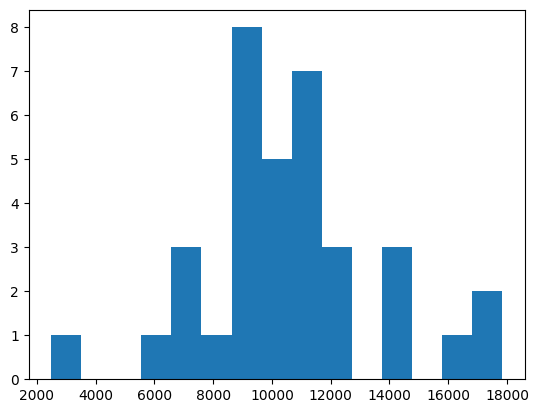

In [5]:
# make a histogram of the word count
plt.hist(df["word_count"], bins=15)

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Data Preprocessing</h2>
    <p>
        Requirements:
    </p>
    <ul>
        <li>
            Remove Punctuation
        </li>
        <li>
            Split strings into lists of individual words
        </li>
        <li>
            Convert the words into integers
        </li>
    </ul>
    <p>
        What was Done:
    </p>
    <ul>
        <li>
            Text was joined together as corpus to look at the WordCloud. This wordcloud shows the most prevalent words. This can sometimes be used to find interesting characters that shouldn't be there or words that are misspelled but everything looked normal. Maybe the words were broad and including a lot of stop words but in an experiment like this we can't remove the stopwords as we want to look at patterns in sentences.
        </li>
        <li>
            Next, the punctuation and /n and /r were filtered out. I don't think /n and /r was in the data but did it just to ensure. We filter out punctuation so we can look clearly at words especially if they are a contraction.
        </li>
        <li>
            Convert the words into sequences of 5. We move through each row of df["text"] to ensure that we are staying strictly within each speech and not mixing sequences of speeches together. 
        </li>
        <li>
            Tokenize with Keras with also having an <OOV> token in order to deal with potential words that are out of vocab. That means that the tokens that are labelled as OOV are not in the original dataset.
        </li>
        <li>
            Lastly, we get the first four tokens as the X(input) and the y(label) is the last token. We are going to predict the fifth token based on the first four tokens. We then pass in the input as a np.array as that is what the neural network expects.
        </li>
    </ul>
</div>



In [6]:
# Join all the text together
text = " ".join(df["text"])

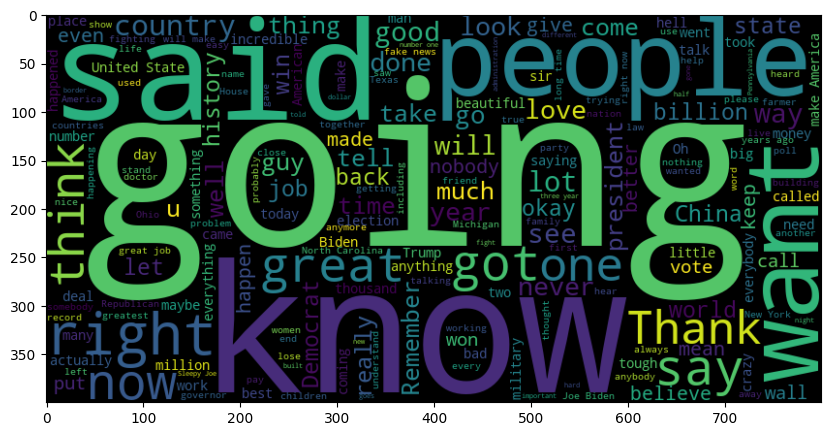

In [7]:
# Create the word cloud object
wordcloud = WordCloud(width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")


In [8]:
# filter out /n and /r (Don't know if it is in there but doesnt hurt)
df["text"] = df["text"].apply(lambda x: re.sub(r"\n|\r", " ", x))

# Filter out any punctuation
df["text"] = df["text"].apply(lambda x: re.sub(r"[^\w\s]", "", x))

Make five word sequences

In [9]:
sequences = []
file_count = 0

# Loop through each text to create sequences of 5 words
for text in df["text"]:
    words = text.split()

    file_count += 1

    count = 0

    # Check if the count + 5 is less than the length of the words
    while count + 5 < len(words):
        try:
            sequence = " ".join(words[count:count + 5])
            sequences.append(sequence)
            count += 1      # we can also use count += 5 to get non-overlapping sequences
        except IndexError:
            break

# Create a dataframe of the sequences
df_sequences = pd.DataFrame(sequences, columns=["sequence"])
print(file_count)
len(df_sequences)


35


369542

In [10]:
# Initialize the tokenizer
tokenizer = Tokenizer(oov_token="<OOV>")    # oov_token is used for out of vocabulary words
tokenizer.fit_on_texts(df_sequences["sequence"])

df_sequences["sequence"] = tokenizer.texts_to_sequences(df_sequences["sequence"])
df_sequences.head()

,sequence
0,"[72, 6, 72, 6, 72]"
1,"[6, 72, 6, 72, 6]"
2,"[72, 6, 72, 6, 4]"
3,"[6, 72, 6, 4, 798]"
4,"[72, 6, 4, 798, 91]"


In [11]:
# split sequences into input and output
X = []
y = []

for sequence in df_sequences["sequence"]:
    X.append(sequence[:-1])     # append all the words except the last one
    y.append(sequence[-1])      # append the last word

print(X[0])
print(y[0])


[72, 6, 72, 6]
72


In [12]:
X = np.array(X)
y = np.array(y)

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Build the Model</h2>
    <p>
        Requirements:
    </p>
    <ul>
        <li>
            Set the number of words as a parameter.
        </li>
        <li>
            Select a subset of the data to be used as a training set.
        </li>
        <li>
            Decide on a training method, for example:
            Use words 1 through n words as features and the n+1 word as the label.
        </li>
    </ul>
    <p>
        How was this done:
    </p>
    <ul>
        <li>
            The vocab size was the amount of unique words + one room for OOV to be able to identify each of these words with their tokens.
        </li>
        <li>
            A 80% training, 10% validation, and 10% testing set. We used a 10% validation in order to track the validation accuracy. Which was used for tracking our accuracy and therefore tracking early stopping.
        </li>
        <li>
            Our training method was using 4 words and then predicting the next word. So 1 through 4 words as features and n+1 as labels. This was chosen as it was a large enough input for the RNN to recognize a pattern.
        </li>
    </ul>
    <p>
        Layers of the Model:
    </p>
    <ul>
        <li>
            An Embedding, which maps each input word to a 100-dimensional vector. The embedding can use pretrained weights, which we supply in the weights parameter. Mapping these input tokens to vectors helps the model identify simalarity between words.
        </li>
        <li>
            A Masking layer, to mask any words that do not have a pretrained embedding, which will be represented as all zeros. Any word not in the GloVe embeddings are hidden by this layer.
        </li>
        <li>
            The heart of the network: a layer of LSTM cells with dropout to prevent overfitting. Since we are only using one LSTM layer, it does not return the sequences. The return being set to false is outputting only the final hidden state which represents the summary of the whole sequence of hidden layers.
        </li>
        <li>
            A fully connected Dense layer with relu. This adds additional representational capacity to the network.
        </li>
        <li>
            A Dense fully connected output layer, this produces a probability for every word in the vocab using softmax. This is done so we can examine how confident in the next label the model is.
        </li>
        <li>
            Compile the model with the Adam optimizer. Adam is an adaptive optimizer that adjusts learning rates automatically, which can accelerate convergence and is generally well-suited for NLP tasks.
        </li>
    </ul>
    <p>
        Requirements of Pretrained Embeddings:
    </p>
    <ul>
        <li>
            Load in the pretrained embeddings; choose embeddings from the GloVe algorithm, which has been trained on Wikipedia texts. Refer to "GloVe: Global Vectors for Word Representation," located in the topic Resources. Assign a 100-dimensional vector to each word in the vocab. If the word has no pretrained embedding, then this vector will be all zeros.
        </li>
    </ul>
    <p>
        How Pretrained Embeddings was Done:
    </p>
    <ul>
        <li>
            We first downloaded GloVe 100 which is 100 dimensions that were added to a dictionary that would be used later
        </li>
        <li>
            We then add every word that has an embedding from GloVe into the embedding matrix at the index from the tokenizer. 
        </li>
        <li>
            Lastly, these weights initialized by GloVe were used in the Embedding layer. This matches the input passed into the model to the GloVe embeddings that we added.
        </li>
    </ul>
    <p>
        Important things Done:
    </p>
    <ul>
        <li>
            Dropout was not added. This was confirmed with professor as it was desired to get a higher training accuracy
        </li>
    </ul>
</div>



In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Masking, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Bring in GloVe:

**Chat explained it well here:**
Suppose you’re training a model to predict the next word in a speech. With GloVe embeddings, the RNN can interpret that "freedom," "independence," and "liberty" have similar meanings based on their vector proximity. So, if your training data has limited occurrences of "liberty," but the model has learned from many instances of "freedom," it can still generalize well when predicting sentences that use either word, thanks to the semantic closeness learned through GloVe.

In [14]:
# initialize an empty dictionary for GloVe embeddings
embeddings_index = {}

# Load the GloVe embeddings
with open("glove.6B.100d.txt", encoding="utf-8") as file:
    for line in file:
        values = line.split()   # split the line by spaces
        word = values[0]        # get the word
        vector = np.array(values[1:], dtype="float32")    # get the vector representation of the word
        embeddings_index[word] = vector   # add the word and its vector to the dictionary

Get the embedding matrix for GloVe by getting our vocab size (num of unique words from tokenizer) and the embedding dimension which is just 100 as that is the model of GloVe we are using

In [15]:
# Get the vocabulary size: the number of unique words in the tokenizer
vocab_size = len(tokenizer.word_index) + 1      # we add 1 because the tokenizer is 1-indexed

# Get the embedding dimension
embedding_dim = 100

# Create an embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

print(embedding_matrix.shape)

(9078, 100)


**Populate the embedding matrix:**

We are looking up in our embedding index dictionary each word and it's vector. With these vectors we will be able to identify close relationships with other vectors. Like the "liberty" and "freedom" example

In [16]:
# Loop through each word and its index from the tokenizer in data preprocessing
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)    # get the GloVe vector for the word

    # if the word is in the GloVe embeddings, then add it to the embedding matrix
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [17]:
# Make a 80/20 split with the 20 being the temporary set (we will make a 50/50 split on this set)
X_temp, X_train, y_temp, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

# Make a 50/50 split for the validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
# Model hyperparameters
embedding_dim = 100   # this is already defined from before but just so we know what it is easily
lstm_units = 128     # number of LSTM units. Number of neurons in the LSTM layer
dense_units = 64     # number of neurons in the dense layer
dropout_rate = 0.2   # dropout rate. Applied after the LSTM layer and the dense layer to prevent overfitting


model = Sequential()

# An Embedding, which maps each input word to a 100-dimensional vector. 
model.add(Embedding(input_dim = vocab_size,     # tells embedding layer how many unique words
                    output_dim = embedding_dim,   # the dimension
                    weights = [embedding_matrix],    # the GloVe embeddings
                    input_length = X_train.shape[1],    # each input sequence is of length 4. Get w/ shape
                    trainable = False))   # we do not want to train the embeddings

# A Masking layer, to mask any words that do not have a pretrained embedding, 
# which will be represented as all zeros. This layer should not be used when training the embeddings.
model.add(Masking(mask_value=0.0))
  
# The heart of the network: a layer of LSTM cells with dropout to prevent overfitting. 
# Since we are only using one LSTM layer, it does not return the sequences; 
# for using two or more layers, make sure to return sequences.
model.add(LSTM(units=lstm_units, return_sequences=False))

# A fully connected Dense layer with relu. This adds additional representational capacity to the network.
model.add(Dense(units=dense_units, activation="relu"))

# Dropout layer, to prevent overfitting to the training data. (I'm gonna hold off on this for now)


# A Dense fully connected output layer, this produces a probability for every word in the vocab using softmax.
model.add(Dense(units=vocab_size, activation="softmax"))

# Compile the model
model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

c:\Users\miche\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │       907,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ masking (Masking)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 907,800 (3.46 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 907,800 (3.46 MB)

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Train the Model</h2>
    <p>
        Requirements:
    </p>
    <ul>
        <li>
            Early Stopping: halts training when validation loss is no longer decreasing.
        </li>
    </ul>
    <p>
        How was this done:
    </p>
    <ul>
        <li>
            Early Stopping was used after 15 patience to allow the training the epochs longer. This still allows the model to not run for the total 100 epochs.
        </li>
        <li>
            The model trained for a total of 27 epochs with a training accuracy 42% and validation accuracy of 16%
        </li>
        <li>
            These accuracies are low but it makes sense as there are many patterns of word that do not necesarilly mean that one specific word is fits all. We earlier ran for the total 100 epochs which got around 19% for both.
        </li>
    </ul>
</div>



In [19]:
# Early stopping callback
early_stopping = EarlyStopping(monitor="val_accuracy", patience=15) # going to not restore best weights to keep the higher training accuracy

# Train the model
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

Epoch 1/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.0452 - loss: 6.6073 - val_accuracy: 0.0901 - val_loss: 5.8977
Epoch 2/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.0978 - loss: 5.6398 - val_accuracy: 0.1162 - val_loss: 5.5989
Epoch 3/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.1206 - loss: 5.2223 - val_accuracy: 0.1283 - val_loss: 5.4790
Epoch 4/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.1379 - loss: 4.9006 - val_accuracy: 0.1410 - val_loss: 5.4581
Epoch 5/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.1520 - loss: 4.6310 - val_accuracy: 0.1499 - val_loss: 5.5068
Epoch 6/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.1689 - loss: 4.3992 - val_accuracy: 0.1569 - val_loss: 5.5851
Epoch 7/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.1829 - loss: 4.1933 - val_accuracy: 0.1625 - val_loss: 5.7612
Epoch 8/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Test the Model</h2>
    <p>
        Requirements:
    </p>
    <ul>
        <li>
            Make predictions by passing in a starting sequence (i.e., an incomplete sentence) and complete it.
        </li>
    </ul>
    <p>
        How was this done:
    </p>
    <ul>
        <li>
            The accuracy for the testing data was around 16%. The accuracy was found between the highest predicted word (argmax) compared to the y_test labels.
        </li>
    </ul>
</div>



In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [265]:
y_pred = model.predict(X_test)

# Get only the index of the highest probability. This is the predicted word.
y_pred = np.argmax(y_pred, axis=1)

4620/4620 ━━━━━━━━━━━━━━━━━━━━ 295s 64ms/step


In [266]:
y_pred

# Get the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 15.91%


<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Analyze the Results</h2>
    <p>
        The model’s predictions were tested on two random sequences, highlighting areas where it generated plausible words that fit contextually but were not exact matches to the expected output. A significant limitation observed was the presence of out-of-vocabulary (OOV) words, such as certain names, which were not covered by the GloVe embeddings. However, despite this, the model generally proposed reasonable alternatives based on context, suggesting it captured the general structure of the language well.
    </p>
    <p>
        The text generation component demonstrates a key strength of the model. Starting with the input phrase “Artzi (our professor) is so very...,” the model generated a coherent continuation despite "Artzi" being an OOV token. This shows the model’s adaptability in building a sequence based on available context and indicates its potential for generating plausible continuations even when encountering unknown words.
    </p>
    <p>
        The generated paragraph is not flawless, but it successfully captures common phrase structures and combinations that align with the style of language we might expect in similar contexts. Interestingly, the model even incorporated phrases reminiscent of Trump’s speaking style.
    </p>
</div>



In [248]:
def printTop5(sequences, label, y_pred):
    print(f"\nSequence: {sequences}\n\nNext word: {label}\n")
        
    # get the top 5 predicted words
    top_5 = y_pred.argsort()[0][::-1][:5]       # 0 is the first sequence, [::-1] to sort in descending order

    for i in top_5:
        word = tokenizer.index_word[i]
        print(f"Word: {word}\t\tProbability: {(y_pred[0][i]) * 100:.2f}%")

In [249]:
def repeatWordFilter(X, y_pred):
    # Get last and second last words from the input sequence
    if(X[0][-1] != 0 and X[0][-2] != 0): 
        if(X[0][-1] == X[0][-2] and X[0][-1] == y_pred.argmax()):
            print("Last two words are the same as highest probable pick. Picking the second most probable word.")
            return tokenizer.index_word[y_pred.argsort()[0][-2]]
    else:
        return None

In [250]:
def test_on_sequence(input, label, printDebug):
    X = []
    
    # for each word in the input, get the index from the tokenizer
    for word in input.split():
        if word in tokenizer.word_index:
            X.append([tokenizer.word_index.get(word)])

    # pad the sequence to make it the same length as the training data
    X = X + [[0]] * (4 - len(X))

    X = np.array(X).reshape(1, -1)  # Reshape to be 2D for model input

    # predict the next word
    y_pred = model.predict(X)

    # match back sequences to words
    sequences = tokenizer.sequences_to_texts([X[0]])[0]

    if printDebug:
        printTop5(sequences, label, y_pred)
    
    filteredWord = repeatWordFilter(X, y_pred)
    if filteredWord is not None:
        return filteredWord

    return tokenizer.index_word[y_pred.argmax()]

In [251]:
# test on the very first sequence in our dataset
random_index = np.random.randint(0, len(X))
words = tokenizer.sequences_to_texts([X[random_index]])[0]
label = tokenizer.index_word[y[random_index]]
test_on_sequence(words, label, printDebug=True)

# test on a random sequence from the dataset
random_index = np.random.randint(0, len(X))
words = tokenizer.sequences_to_texts([X[random_index]])[0]
label = tokenizer.index_word[y[random_index]]
test_on_sequence(words, label, printDebug=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Sequence: world qasem soleimani is

Next word: dead

Word: it		Probability: 24.20%
Word: a		Probability: 12.05%
Word: one		Probability: 8.24%
Word: that		Probability: 7.11%
Word: the		Probability: 6.71%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Sequence: money on electric so

Next word: were

Word: many		Probability: 29.56%
Word: much		Probability: 17.61%
Word: we		Probability: 7.87%
Word: they		Probability: 6.37%
Word: i		Probability: 5.13%


'many'

In [269]:
words = "Artzi is so very"

# filter out any punctuation
words = re.sub(r"[^\w\s]", "", words)

# lowercase the words
words = words.lower()

label = "n/a"

for i in range(30):
    # get the last 4 words
    input = " ".join(words.split()[-4:])
    print(f"THIS INPUT: {input}\n")
    output = test_on_sequence(input, "n/a", printDebug=True)
    words += " " + output

THIS INPUT: artzi is so very

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step

Sequence: is so very <OOV>

Next word: n/a

Word: sick		Probability: 28.15%
Word: unhappy		Probability: 11.06%
Word: soon		Probability: 8.75%
Word: simple		Probability: 6.02%
Word: interesting		Probability: 4.66%
THIS INPUT: is so very sick

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step

Sequence: is so very sick

Next word: n/a

Word: impacted		Probability: 7.51%
Word: territory		Probability: 6.33%
Word: anymore		Probability: 5.96%
Word: and		Probability: 5.24%
Word: but		Probability: 5.04%
THIS INPUT: so very sick impacted

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step

Sequence: so very sick impacted

Next word: n/a

Word: rebuilt		Probability: 83.72%
Word: coming		Probability: 1.27%
Word: what		Probability: 1.21%
Word: happening		Probability: 0.78%
Word: all		Probability: 0.71%
THIS INPUT: very sick impacted rebuilt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Sequence: very sick impacted rebuilt

Next word: n/a

Word: your		Probab

In [270]:
words

'artzi is so very sick impacted rebuilt your second amendment and they mustve want to indoctrinate the man and then they said you know the same exactly was a poll on a disgrace but'

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Conclusion</h2>
    <p>
        Highlights of Challenges Overcame:
    </p>
    <ul>
        <li>
            The most proud accomplishment was solving the problem of text generation with the model. It took time to setup but it initially looked good in a process of just repeating getting an output.
        </li>
        <li>
            An error did pop up of the same word becoming said over and over again. To solve this after two occurences of the same word, if the word is said again it will instead swap out that word to get the second most probable word to switch up the sentence.
        </li>
        <li>
            The dropout layer was removed as our model was very low accuracy in all categories so we decided to let it overfit a bit in this area of the model. We wanted to at least project well on a portion of Trump's speeches while also maintaining the original accuracy we had with test and validation sets which was accompished.
        </li>
        <li>    
            Many different sizes of datasets were attempted to be selected for this dataset. Originally it was movie lines from a specific actor. We then moved to a dataset of 503 Trump speeches which was computationally not in scope for this project. We then landed on this dataset of 35 speeches to have a large enough sample to train and tune in a reasonable amount of time and computational power.
        </li>
    </ul>
    <p>
        Overall the project was a successful introduction to how we could infer what a specific person would say when we have large enough samples of speaking styles on them.
    </p>
    <p>
        This approach could have practical applications, such as creating personalized text generation systems that adapt to an individual's unique communication style, making interactions more tailored and contextually appropriate for different users or workplace environments.
    </p>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>References</h2>
    <p>  
    <a href="https://nlp.stanford.edu/projects/glove/">GloVe (Global Vectors for Word Representation)</a>  
    – Download location for GloVe. The first link was downloaded to get the 100-dimensional vectors.  
</p>

<p>  
    <a href="https://www.kaggle.com/datasets/christianlillelund/donald-trumps-rallies">Trump Speeches Dataset on Kaggle</a>  
    – This dataset contains text data for speeches given by Donald Trump, available for analysis and model building.  
</p>

<p>  
    <a href="https://numpy.org/doc/stable/">NumPy Documentation</a>  
    – The primary resource for NumPy's documentation, which includes user guides, installation instructions, and a comprehensive API reference for array manipulation and scientific computing tasks.  
</p>

<p>  
    <a href="https://matplotlib.org/stable/contents.html">Matplotlib Documentation</a>  
    – Official documentation for Matplotlib, detailing its functionality for creating static, animated, and interactive visualizations in Python.  
</p>

<p>  
    <a href="https://pandas.pydata.org/pandas-docs/stable/">Pandas Documentation</a>  
    – A comprehensive guide to Pandas, including tutorials, API references, and user guides for data manipulation and analysis with DataFrames.  
</p>

<p>  
    <a href="https://docs.python.org/3/library/re.html">re (Regular Expressions) Documentation</a>  
    – The Python `re` module documentation, offering detailed guidance on pattern matching and working with regular expressions in Python.  
</p>

<p>  
    <a href="https://www.kaggle.com/docs">KaggleHub Documentation</a>  
    – While specific to Kaggle’s API, this reference provides access to detailed usage instructions for KaggleHub, which is commonly used for interacting with datasets and models.  
</p>

<p>  
    <a href="https://docs.python.org/3/library/os.html">os Module Documentation</a>  
    – The official Python documentation for the `os` module, explaining how to interact with the operating system for tasks like file and directory management.  
</p>

<p>  
    <a href="https://github.com/amueller/word_cloud">WordCloud Documentation</a>  
    – Documentation for the WordCloud Python library, offering a simple interface to generate word clouds from text data.  
</p>

<p>  
    <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer">TensorFlow Tokenizer Documentation</a>  
    – Detailed usage of the Tokenizer class in TensorFlow's Keras module for text tokenization, essential in preprocessing natural language data.  
</p>

<p>  
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split (scikit-learn)</a>  
    – Official documentation for `train_test_split` from scikit-learn, detailing its use for splitting datasets into training and testing subsets.  
</p>

<p>  
    <a href="https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential">TensorFlow Sequential Model Documentation</a>  
    – Documentation for the Sequential model in Keras, which allows the creation of neural networks by stacking layers sequentially.  
</p>

<p>  
    <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers">Keras Layers API Documentation</a>  
    – Complete reference for all Keras layers, including Embedding, LSTM, Dense, and Dropout layers, used in neural network construction.  
</p>

<p>  
    <a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam">Adam Optimizer Documentation (TensorFlow Keras)</a>  
    – Official documentation for the Adam optimizer, a widely used optimization algorithm for training deep learning models.  
</p>

<p>  
    <a href="https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping">EarlyStopping Callback Documentation (TensorFlow Keras)</a>  
    – Information about the EarlyStopping callback, which is used to halt training when a monitored metric stops improving.  
</p>

<p>  
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">accuracy_score (scikit-learn)</a>  
    – A function that calculates the accuracy of classification models, helping evaluate model performance.  
</p>

<p>  
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html">confusion_matrix (scikit-learn)</a>  
    – A function for computing the confusion matrix, useful for evaluating the performance of classification models.  
</p>

<p>  
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html">classification_report (scikit-learn)</a>  
    – Provides a comprehensive report with precision, recall, and F1-score for classification tasks.  
</p>
</div>

